In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [40]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings("ignore")

### Import Kiva Dataset

In [3]:
df = pd.read_csv("kiva_data.csv")
df.sample(5)

,loan_amount,activity,country,gender
35370,350,General Store,Philippines,female
18107,250,General Store,Kenya,female
53541,225,General Store,Philippines,female
18773,1000,General Store,El Salvador,male
46351,650,General Store,Philippines,female


### Data Information 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   loan_amount  65499 non-null  int64 
 1   activity     65499 non-null  object
 2   country      65499 non-null  object
 3   gender       65499 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.0+ MB


In [5]:
df.describe()

,loan_amount
count,65499.000000
mean,361.627277
std,194.798936
min,50.000000
25%,225.000000
50%,325.000000
75%,450.000000
max,1000.000000


In [6]:
df = df.rename(columns = {"loan_amount": "Loan $",
                          "activity": "Activity",
                          "country": "Country",
                          "gender": "Gender"})
df.head()

,Loan $,Activity,Country,Gender
0,625,Food Production/Sales,Pakistan,female
1,250,Food Production/Sales,Pakistan,female
2,400,Food Production/Sales,Pakistan,female
3,400,Food Production/Sales,Pakistan,female
4,500,Food Production/Sales,Pakistan,female


# Analytics

**Distribution of Loan Amount**

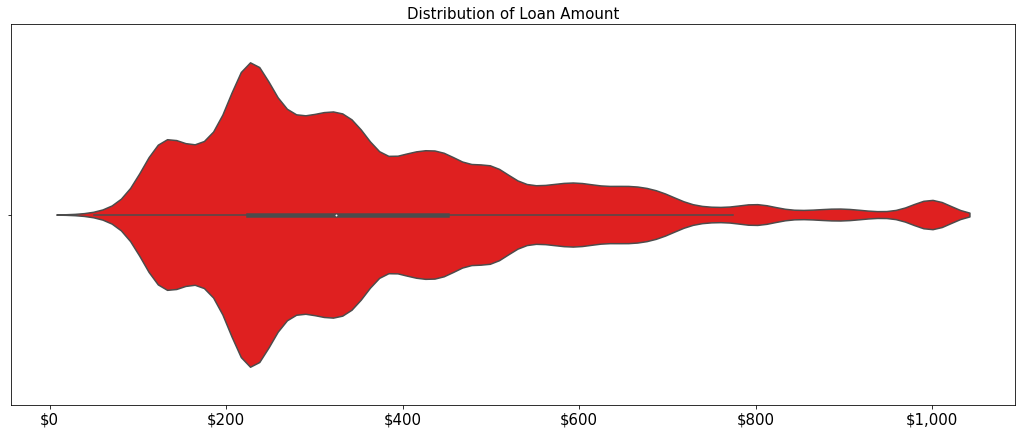

In [7]:
f, ax = plt.subplots(figsize = (18, 7))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
sns.violinplot(x = df["Loan $"], color = "red")
plt.title("Distribution of Loan Amount", size = 15)
plt.xlabel("Loan $", size = 15)
plt.xticks(size = 15)
plt.xlabel(None)
plt.show()

**Distribution of Loan Amount by Activity**

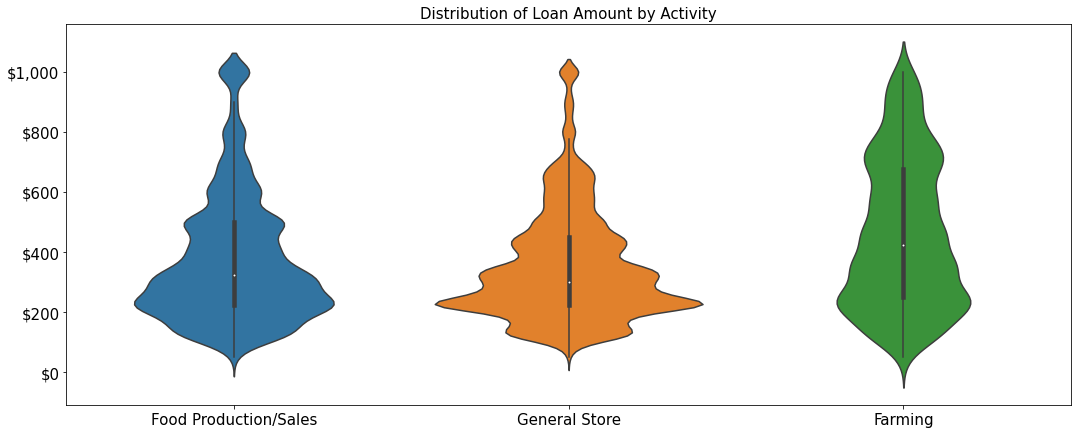

In [8]:
f, ax = plt.subplots(figsize = (18, 7))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.violinplot(x = "Activity", y = "Loan $", data = df)
plt.title("Distribution of Loan Amount by Activity", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Distribution of Loan Amount by Country**

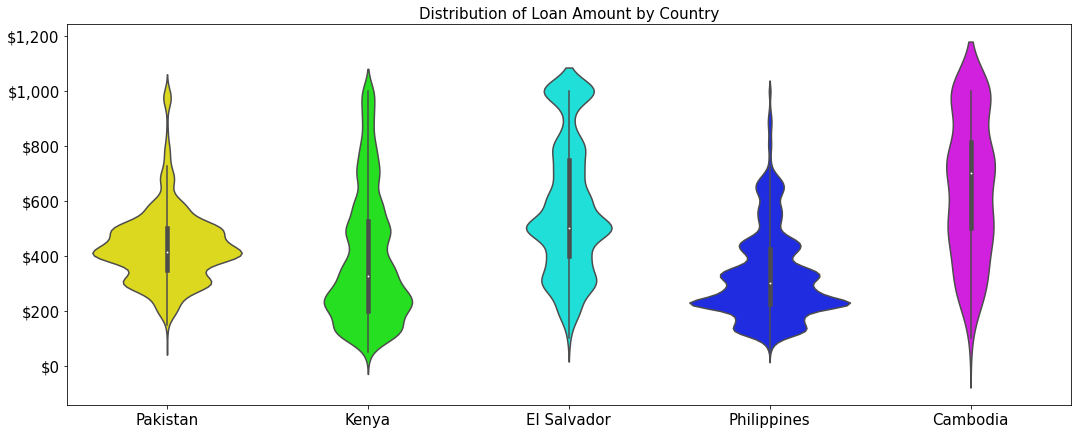

In [9]:
f, ax = plt.subplots(figsize = (18, 7))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.violinplot(x = "Country", y = "Loan $", data = df, palette = "hsv")
plt.title("Distribution of Loan Amount by Country", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Distribution of Loan Amount by Gender**

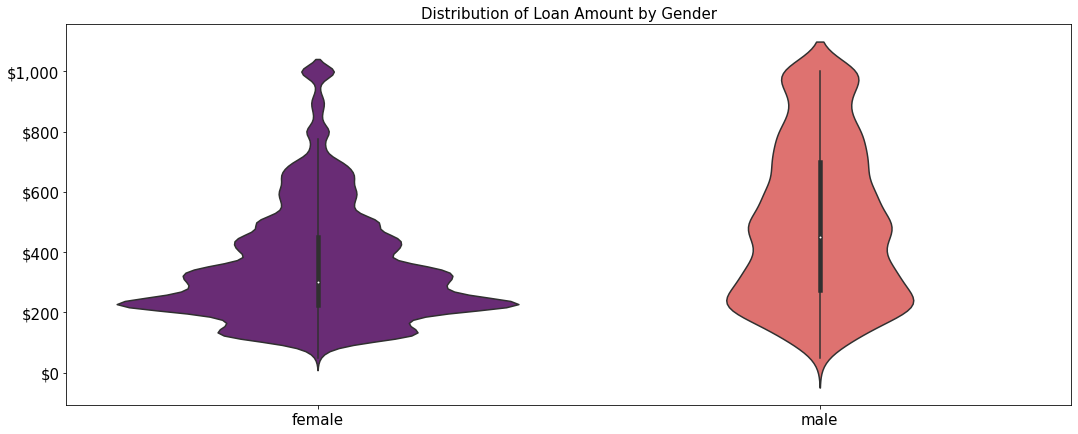

In [10]:
f, ax = plt.subplots(figsize = (18, 7))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.violinplot(x = "Gender", y = "Loan $", data = df, palette = "magma")
plt.title("Distribution of Loan Amount by Gender", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Top 10 Loan Amounts by Frequency**

In [11]:
l = df["Loan $"].value_counts().to_frame().reset_index()
l.columns = ["Loan $", "Frequency"]
l = l.sort_values(by = "Frequency", ascending = False)
l.head(10)

,Loan $,Frequency
0,225,8206
1,250,4201
2,325,4050
3,125,4019
4,350,3956
5,300,3833
6,275,3390
7,200,2942
8,450,2780
9,500,2610


**Activities by Frequency**

In [12]:
a = df["Activity"].value_counts().to_frame().reset_index()
a.columns = ["Activity", "Loans"]
a["Percentage"] = ((a["Loans"] / a["Loans"].sum()) * 100)
a.round(2)

,Activity,Loans,Percentage
0,General Store,49516,75.60
1,Food Production/Sales,13239,20.21
2,Farming,2744,4.19


**Number of Loans by Country**

In [13]:
c = df["Country"].value_counts().to_frame().reset_index()
c.columns = ["Country", "Loans"]
c["Percentage"] = (c["Loans"] / c["Loans"].sum()) * 100
c.round(2)

,Country,Loans,Percentage
0,Philippines,50273,76.75
1,Kenya,7100,10.84
2,El Salvador,6172,9.42
3,Pakistan,1786,2.73
4,Cambodia,168,0.26


**Number of Loans by Gender**

In [14]:
g = df["Gender"].value_counts().to_frame().reset_index()
g.columns = ["Gender", "Loans"]
g

,Gender,Loans
0,female,61632
1,male,3867


### Advanced Analysis

**Statistics of loan by Activity**

In [15]:
la = df.groupby("Activity")["Loan $"].agg(["count", "sum", "min", "mean", "max"])
la = la.reset_index()
la.columns = ["Activity", "Frequency", "Total Loan $", "Min Loan $", "Avg Loan $", "Max Loan $"]
la["Frequency %"] = (la["Frequency"] / la["Frequency"].sum()) * 100
la["Loan %"] = (la["Total Loan $"] / la["Total Loan $"].sum()) * 100
la.round(2)
la = la[["Activity", "Frequency", "Frequency %", "Total Loan $", "Loan %", "Min Loan $", "Avg Loan $", "Max Loan $"]]
la

,Activity,Frequency,Frequency %,Total Loan $,Loan %,Min Loan $,Avg Loan $,Max Loan $
0,Farming,2744,4.189377,1258650,5.313848,50,458.691691,1000
1,Food Production/Sales,13239,20.212522,4939725,20.854843,50,373.119193,1000
2,General Store,49516,75.598101,17487850,73.831309,50,353.175741,1000


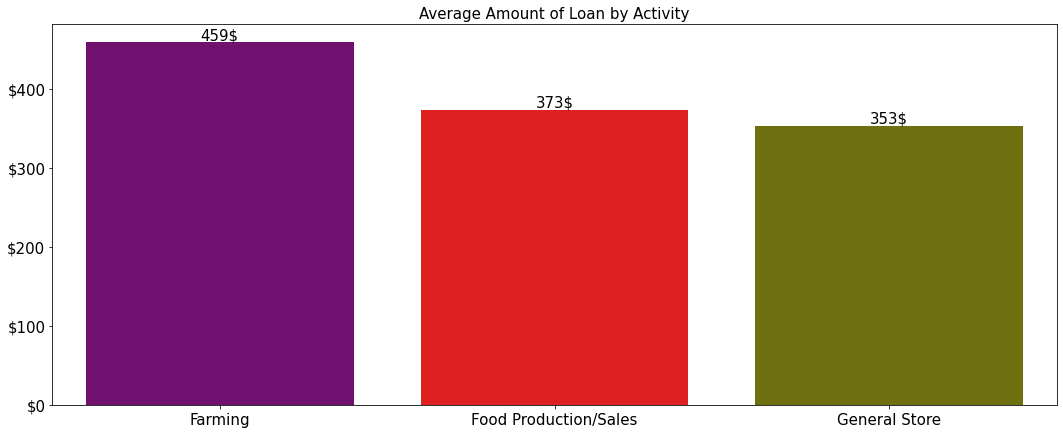

In [16]:
f, ax = plt.subplots(figsize = (18, 7))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
graph = sns.barplot(x = "Activity", y = "Avg Loan $", data = la, palette = "brg")
for p in graph.patches:
        graph.annotate('{:.0f}$'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Average Amount of Loan by Activity", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Statistics of loan by Country**

In [17]:
lc = df.groupby("Country")["Loan $"].agg(["count", "sum", "min", "mean", "max"])
lc = lc.reset_index()
lc.columns = ["Country", "Frequency", "Total Loan $", "Min Loan $", "Avg Loan $", "Max Loan $"]
lc["Frequency %"] = (lc["Frequency"] / lc["Frequency"].sum()) * 100
lc["Loan %"] = (lc["Total Loan $"] / lc["Total Loan $"].sum()) * 100
lc.round(2)
lc = lc[["Country", "Frequency", "Frequency %", "Total Loan $", "Loan %", "Min Loan $", "Avg Loan $", "Max Loan $"]]
lc

,Country,Frequency,Frequency %,Total Loan $,Loan %,Min Loan $,Avg Loan $,Max Loan $
0,Cambodia,168,0.256492,108375,0.457544,100,645.089286,1000
1,El Salvador,6172,9.423045,3528725,14.897794,100,571.731205,1000
2,Kenya,7100,10.839860,2778975,11.732452,50,391.404930,1000
3,Pakistan,1786,2.726759,775950,3.275955,100,434.462486,1000
4,Philippines,50273,76.753844,16494200,69.636255,50,328.092614,1000


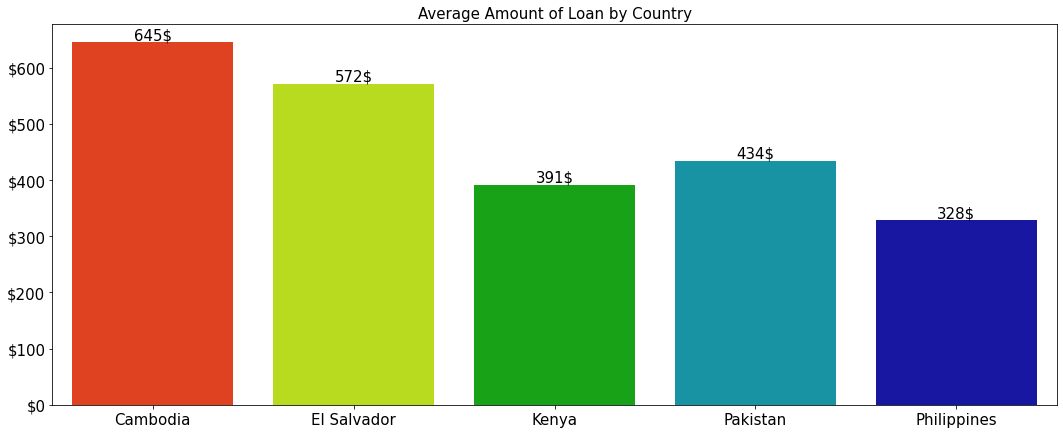

In [18]:
f, ax = plt.subplots(figsize = (18, 7))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
graph = sns.barplot(x = "Country", y = "Avg Loan $", data = lc, palette = "nipy_spectral_r")
for p in graph.patches:
        graph.annotate('{:.0f}$'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Average Amount of Loan by Country", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Statistics of Loan by Gender**

In [19]:
lg = df.groupby("Gender")["Loan $"].agg(["count", "sum", "min", "mean", "max"])
lg = lg.reset_index()
lg.columns = ["Gender", "Frequency", "Total Loan $", "Min Loan $", "Avg Loan $", "Max Loan $"]
lg["Frequency %"] = (lg["Frequency"] / lg["Frequency"].sum()) * 100
lg["Loan %"] = (lg["Total Loan $"] / lg["Total Loan $"].sum()) * 100
lg.round(2)
lg = lg[["Gender", "Frequency", "Frequency %", "Total Loan $", "Loan %", "Min Loan $", "Avg Loan $", "Max Loan $"]]
lg

,Gender,Frequency,Frequency %,Total Loan $,Loan %,Min Loan $,Avg Loan $,Max Loan $
0,female,61632,94.096093,21767175,91.898034,50,353.179761,1000
1,male,3867,5.903907,1919050,8.101966,50,496.263253,1000


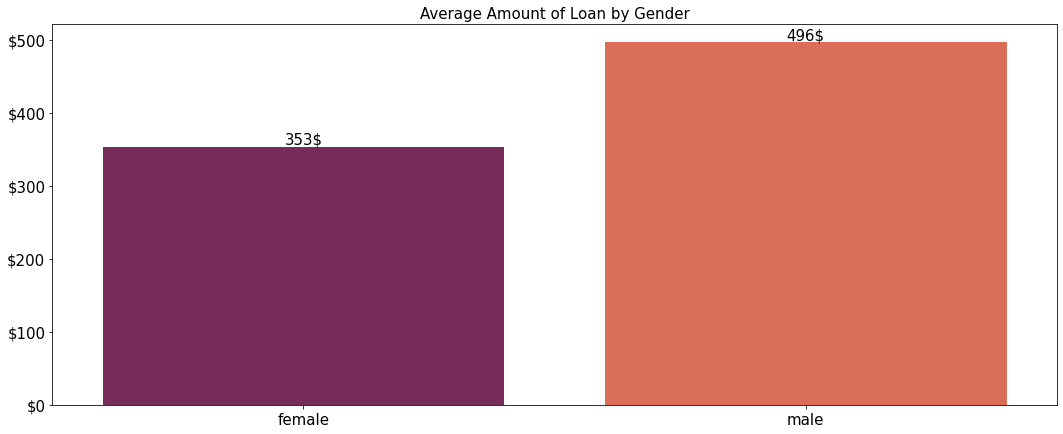

In [20]:
f, ax = plt.subplots(figsize = (18, 7))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
graph = sns.barplot(x = "Gender", y = "Avg Loan $", data = lg, palette = "rocket")
for p in graph.patches:
        graph.annotate('{:.0f}$'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Average Amount of Loan by Gender", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

### Deep Analysis

**Loan of Activity by Country**

In [21]:
lac = df.groupby(["Country", "Activity"])["Loan $"].agg(["count", "sum", "min", "mean", "max"]).reset_index()
lac.columns = ["Country", "Activity", "Frequency", "Loan $", "Min Loan $", "Avg Mean $", "Max Mean $"]
lac

,Country,Activity,Frequency,Loan $,Min Loan $,Avg Mean $,Max Mean $
0,Cambodia,Food Production/Sales,75,48275,200,643.666667,1000
1,Cambodia,General Store,93,60100,100,646.236559,1000
2,El Salvador,Food Production/Sales,3750,2046325,100,545.686667,1000
3,El Salvador,General Store,2422,1482400,100,612.056152,1000
4,Kenya,Farming,2636,1212500,50,459.977238,1000
5,Kenya,Food Production/Sales,788,268450,50,340.672589,1000
6,Kenya,General Store,3676,1298025,50,353.107998,1000
7,Pakistan,Farming,108,46150,100,427.314815,975
8,Pakistan,Food Production/Sales,87,38175,225,438.793103,975
9,Pakistan,General Store,1591,691625,150,434.710874,1000


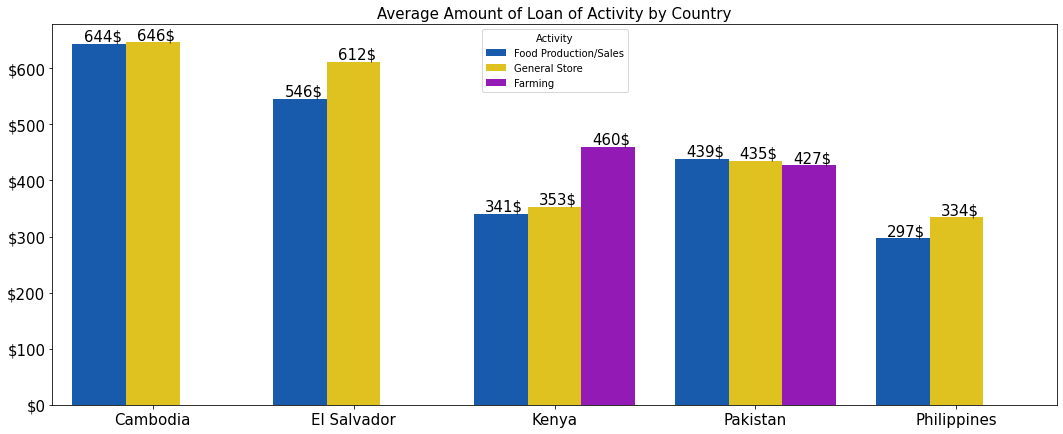

In [22]:
f, ax = plt.subplots(figsize = (18, 7))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
graph = sns.barplot(x = "Country", y = "Avg Mean $", hue = "Activity", data = lac, palette = "prism")
for p in graph.patches:
        graph.annotate('{:.0f}$'.format(p.get_height()), 
                      (p.get_x()+0.15, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Average Amount of Loan of Activity by Country", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**No of Loan of Gender by Country**

In [23]:
lgc = df.groupby(["Country", "Gender"])["Loan $"].agg(["count", "sum", "min", "mean", "max"]).reset_index()
lgc.columns = ["Country", "Gender", "Frequency", "Loan $", "Min Loan $", "Avg Loan $", "Max Loan $"]
lgc.round(2)

,Country,Gender,Frequency,Loan $,Min Loan $,Avg Loan $,Max Loan $
0,Cambodia,female,93,52350,100,562.90,1000
1,Cambodia,male,75,56025,225,747.00,1000
2,El Salvador,female,5480,3109650,100,567.45,1000
3,El Salvador,male,692,419075,100,605.60,1000
4,Kenya,female,4943,1705475,50,345.03,1000
5,Kenya,male,2157,1073500,50,497.68,1000
6,Pakistan,female,1732,741275,100,427.99,1000
7,Pakistan,male,54,34675,200,642.13,975
8,Philippines,female,49384,16158425,50,327.20,1000
9,Philippines,male,889,335775,75,377.70,1000


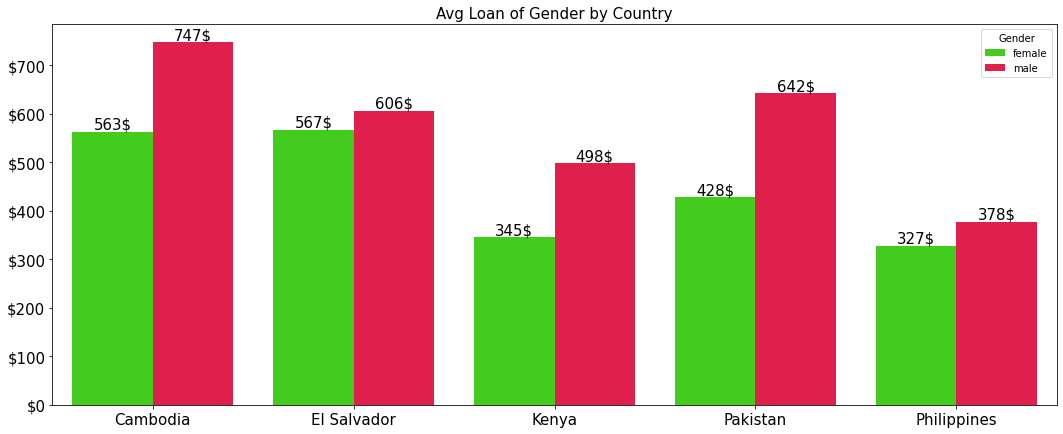

In [24]:
f, ax = plt.subplots(figsize = (18, 7))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
graph = sns.barplot(x = "Country", y = "Avg Loan $", hue = "Gender", data = lgc, palette = "prism")
for p in graph.patches:
        graph.annotate('{:.0f}$'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Avg Loan of Gender by Country", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**No of Loan of Gender by Activity**

In [25]:
lag = df.groupby(["Activity", "Gender"])["Loan $"].agg(["count", "sum", "min", "mean", "max"]).reset_index()
lag.columns = ["Activity", "Gender", "Frequency", "Loan $", "Min Loan $", "Avg Loan $", "Max Loan $"]
lag.round(2)

,Activity,Gender,Frequency,Loan $,Min Loan $,Avg Loan $,Max Loan $
0,Farming,female,1485,576050,75,387.91,1000
1,Farming,male,1259,682600,50,542.18,1000
2,Food Production/Sales,female,12775,4710925,50,368.76,1000
3,Food Production/Sales,male,464,228800,75,493.10,1000
4,General Store,female,47372,16480200,50,347.89,1000
5,General Store,male,2144,1007650,75,469.99,1000


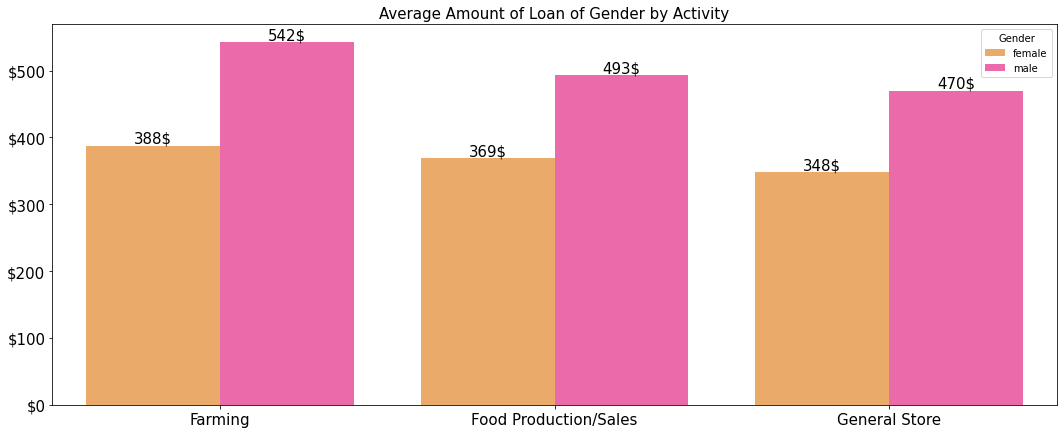

In [26]:
f, ax = plt.subplots(figsize = (18, 7))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
graph = sns.barplot(x = "Activity", y = "Avg Loan $", hue = "Gender", data = lag, palette = "spring_r")
for p in graph.patches:
        graph.annotate('{:.0f}$'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Average Amount of Loan of Gender by Activity", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()